In [1]:
def eroeiccs(eroei,fop):
    return eroei*1.0/(1+fop*eroei)

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager

In [3]:
#plt.style.use('fivethirtyeight')
#plt.style.use('classic')
plt.style.use('seaborn-darkgrid')

In [4]:
%matplotlib inline
prop = font_manager.FontProperties('Segoe UI')

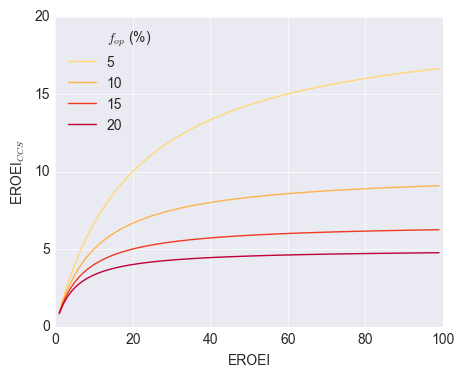

In [5]:
plt.figure(figsize=(5,4))
x=range(1,100)
colors=['#fed976',
        '#feb24c',
        #'#fd8d3c',
        '#f03b20',
        '#bd0036']
plt.plot(0,0,lw=0,label='$f_{op}$ (%)')
rops=[0.05,0.1,0.15,0.2]
for r in range(len(rops)):
    rop=rops[r]
    y=[eroeiccs(i,rop) for i in x]
    plt.plot(x,y,c=colors[r],label=int(rop*100))

plt.ylabel('EROEI$_{CCS}$')
plt.xlabel('EROEI')
plt.legend(framealpha=0,loc=2,fontsize=10)
plt.ylim(0,20)
plt.savefig('x.png',bbox_inches = 'tight', facecolor='w', pad_inches = 0.1, dpi=150)
plt.show()

In [6]:
def eroeist(eroei,fi,eta,esoi):
    return 1.0*((1-fi)+(eta*fi))/((1.0/eroei)+(eta*fi/esoi))

In [7]:
eroeist(40,0.1,78,15.2)

16.166259168704155

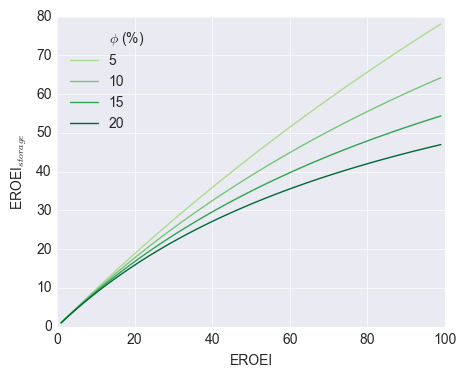

In [8]:
plt.figure(figsize=(5,4))
x=range(1,100)
colors=['#addd8e',
        '#78c679',
        '#31a354',
        '#006837']
plt.plot(0,0,lw=0,label='${\phi}$ (%)')
esoi=15.2 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
eta= 0.78 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
fis=[0.05,0.1,0.15,0.2]
for r in range(len(fis)):
    fi=fis[r]
    y=[eroeist(i,fi,eta,esoi) for i in x]
    plt.plot(x,y,c=colors[r],label=int(fi*100))

plt.ylabel('EROEI$_{storage}$')
plt.xlabel('EROEI')
plt.legend(framealpha=0,loc=2,fontsize=10)
#plt.ylim(0,20)
#plt.savefig('y.png',bbox_inches = 'tight', facecolor='w', pad_inches = 0.1, dpi=150)
plt.show()

Note: We assumed a storage technology mix of Batteries:CAES:PHS of 85%:7%:8%, leading to S=125 with storage technology  ESOIs 15.2 (all batteries averaged), 797 and 704 taken from Table 1 of  (Barnhart et al 2013)

In [9]:
eta=[0.90,0.75,0.90,0.75,0.60,0.70,0.85]
S=[32,20,5,10,9,797,704]
shr0=[0.2,0.2,0.2,0.2,0.2,0,0]
shr1=[0.1,0.1,0.1,0.1,0.1,0.25,0.25]
eta0=sum([eta[i]*shr0[i] for i in range(len(eta))])
eta1=sum([eta[i]*shr1[i] for i in range(len(eta))])
S0=sum([S[i]*shr0[i] for i in range(len(eta))])
S1=sum([S[i]*shr1[i] for i in range(len(eta))])

In [10]:
print eta0
print eta1
print S0
print S1

0.78
0.7775
15.2
382.85


In [11]:
re0=[10,40]
xr0=[eroeist(i,0.4,eta0,S0) for i in re0] #all batteries averaged
re1=[10,33]
xr1=[eroeist(i,0.4,eta1,S1) for i in re1] #all batteries averaged

In [12]:
ff0=[9.6, 41.8]
xf0=[eroeiccs(i,0.147) for i in ff0]
ff1=[8.9, 22.6]
xf1=[eroeiccs(i,0.219) for i in ff1]

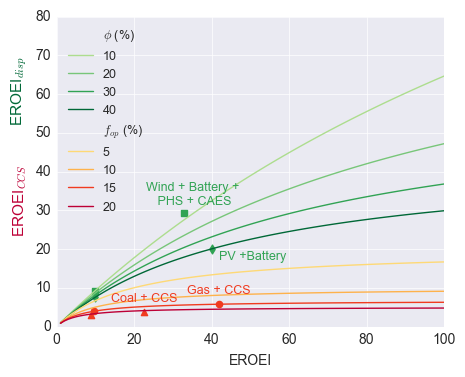

In [13]:
plt.figure(figsize=(5,4))
n=101
x=range(1,n)

colors=['#addd8e',
        '#78c679',
        '#31a354',
        '#006837']
cf="#f03b20"
cr="#31a354"
cg="#aaaaaa"
plt.plot(0,0,lw=0,label='${\phi}$ (%)')
#ax=plt.gca().twinx()
esoi=15.2 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
eta= 0.78 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
fis=[0.1,0.2,0.3,0.4]
for r in range(len(fis)):
    fi=fis[r]
    y=[eroeist(i,fi,eta,esoi) for i in x]
    plt.plot(x,y,c=colors[r],label=int(fi*100))

#plt.ylabel('EROEI$_{storage}$')
plt.xlabel('EROEI')
a=plt.gca()
#plt.legend(framealpha=0,loc=2,fontsize=10)
plt.text(-0.07, 0.65, 'EROEI$_{disp}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#006837',transform=plt.gca().transAxes)
plt.text(-0.07, 0.29, 'EROEI$_{CCS}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#bd0036',transform=plt.gca().transAxes)

colors=['#fed976',
        '#feb24c',
        #'#fd8d3c',
        '#f03b20',
        '#bd0036']
#plt.plot(0,0,lw=0,label=' ')
plt.plot(0,0,lw=0,label='$f_{op}$ (%)')
rops=[0.05,0.1,0.15,0.2]
for r in range(len(rops)):
    rop=rops[r]
    y=[eroeiccs(i,rop) for i in x]
    plt.plot(x,y,c=colors[r],label=int(rop*100))

plt.scatter(ff0,xf0,color="#f03b20",marker='o')
plt.scatter(ff1,xf1,color="#f03b20",marker='^')
plt.scatter(re0,xr0,color="#31a354",marker='d')
plt.scatter(re1,xr1,color="#31a354",marker='s')
plt.xlim(0,100)
plt.ylim(0,80)

plt.text(re0[1]+2, xr0[1]-2, 'PV +Battery',
        horizontalalignment='left',
        verticalalignment='center',
        size=9,color=cr)
plt.text(re1[1]+2, xr1[1]+1.5, 'Wind + Battery +\n PHS + CAES',
        horizontalalignment='center',
        verticalalignment='bottom',
        size=9,color=cr)
plt.text(ff0[1], xf0[1]+2, 'Gas + CCS',
        horizontalalignment='center',
        verticalalignment='bottom',
        size=9,color=cf)
plt.text(ff1[1], xf1[1]+2, 'Coal + CCS',
        horizontalalignment='center',
        verticalalignment='bottom',
        size=9,color=cf)
    
#plt.ylabel('EROEI$_{CCS}$')
#plt.xlabel('EROEI')
plt.legend(framealpha=0,loc=2,fontsize=9)
#plt.savefig('z1.png',bbox_inches = 'tight', facecolor='w', pad_inches = 0.1, dpi=150)
plt.show()

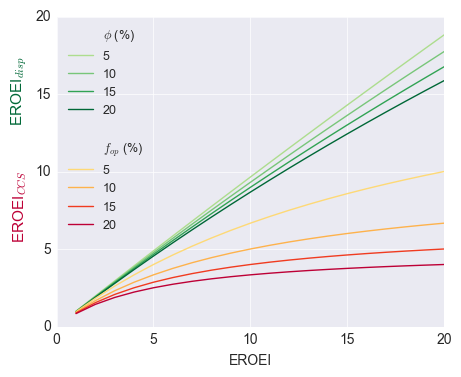

In [14]:
plt.figure(figsize=(5,4))
n=21
x=range(1,n)

colors=['#addd8e',
        '#78c679',
        '#31a354',
        '#006837']
plt.plot(0,0,lw=0,label='${\phi}$ (%)')
#ax=plt.gca().twinx()
esoi=15.2 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
eta= 0.78 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
fis=[0.05,0.1,0.15,0.2]
for r in range(len(fis)):
    fi=fis[r]
    y=[eroeist(i,fi,eta,esoi) for i in x]
    plt.plot(x,y,c=colors[r],label=int(fi*100))

#plt.ylabel('EROEI$_{storage}$')
plt.xlabel('EROEI')
a=plt.gca()
#plt.legend(framealpha=0,loc=2,fontsize=10)
plt.text(-0.07, 0.65, 'EROEI$_{disp}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#006837',transform=plt.gca().transAxes)
plt.text(-0.07, 0.27, 'EROEI$_{CCS}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#bd0036',transform=plt.gca().transAxes)

colors=['#fed976',
        '#feb24c',
        #'#fd8d3c',
        '#f03b20',
        '#bd0036']
plt.plot(0,0,lw=0,label=' ')
plt.plot(0,0,lw=0,label='$f_{op}$ (%)')
rops=[0.05,0.1,0.15,0.2]
for r in range(len(rops)):
    rop=rops[r]
    y=[eroeiccs(i,rop) for i in x]
    plt.plot(x,y,c=colors[r],label=int(rop*100))

#plt.ylabel('EROEI$_{CCS}$')
#plt.xlabel('EROEI')
plt.legend(framealpha=0,loc=2,fontsize=9)
#plt.savefig('z2.png',bbox_inches = 'tight', facecolor='w', pad_inches = 0.1, dpi=150)
plt.show()

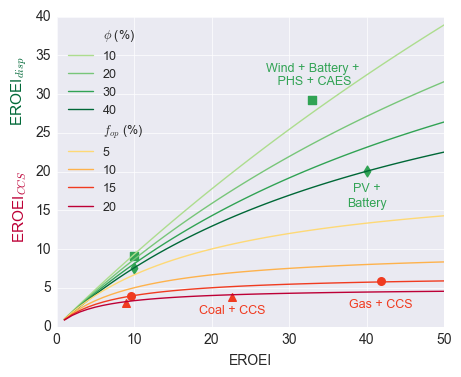

In [15]:
plt.figure(figsize=(5,4))
n=51
x=range(1,n)

colors=['#addd8e',
        '#78c679',
        '#31a354',
        '#006837']
plt.plot(0,0,lw=0,label='${\phi}$ (%)')
#ax=plt.gca().twinx()
esoi=15.2 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
eta= 0.78 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
fis=[0.1,0.2,0.3,0.4]
for r in range(len(fis)):
    fi=fis[r]
    y=[eroeist(i,fi,eta,esoi) for i in x]
    plt.plot(x,y,c=colors[r],label=int(fi*100))

#plt.ylabel('EROEI$_{storage}$')
plt.xlabel('EROEI')
a=plt.gca()
#plt.legend(framealpha=0,loc=2,fontsize=10)
plt.text(-0.07, 0.65, 'EROEI$_{disp}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#006837',transform=plt.gca().transAxes)
plt.text(-0.07, 0.27, 'EROEI$_{CCS}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#bd0036',transform=plt.gca().transAxes)

colors=['#fed976',
        '#feb24c',
        #'#fd8d3c',
        '#f03b20',
        '#bd0036']
#plt.plot(0,0,lw=0,label=' ')
plt.plot(0,0,lw=0,label='$f_{op}$ (%)')
rops=[0.05,0.1,0.15,0.2]
for r in range(len(rops)):
    rop=rops[r]
    y=[eroeiccs(i,rop) for i in x]
    plt.plot(x,y,c=colors[r],label=int(rop*100))

cf="#f03b20"
cr="#31a354"
cg="#aaaaaa"
s=30
plt.scatter(ff0,xf0,s,color=cf,marker='o')
plt.scatter(ff1,xf1,s,color=cf,marker='^')
plt.scatter(re0,xr0,s,color=cr,marker='d')
plt.scatter(re1,xr1,s,color=cr,marker='s')
plt.xlim(0,50)
plt.ylim(0,40)
#plt.annotate('  PV +\nbattery', xy=(re0[0],xr0[0]),\
#                xycoords='data', fontsize=9, color=cg,
#                xytext=(35, 5), textcoords='offset points',
#                horizontalalignment='left', verticalalignment='center',
#                arrowprops=dict(arrowstyle="->",color=cg)) 
#plt.annotate('  ', xy=(re0[1],xr0[1]),\
#                xycoords='data', fontsize=9, color=cr,
#                xytext=(-100, -60), textcoords='offset points',
#                horizontalalignment='left', verticalalignment='center',
#                arrowprops=dict(arrowstyle="-",linestyle='--',lw=0.5,color=cg)) 
plt.text(re0[1], xr0[1]-1.5, 'PV +\nBattery',
        horizontalalignment='center',
        verticalalignment='top',
        size=9,color=cr)
plt.text(re1[1], xr1[1]+1.5, 'Wind + Battery +\n PHS + CAES',
        horizontalalignment='center',
        verticalalignment='bottom',
        size=9,color=cr)
plt.text(ff0[1], xf0[1]-2.2, 'Gas + CCS',
        horizontalalignment='center',
        verticalalignment='top',
        size=9,color=cf)
plt.text(ff1[1], xf1[1]-1, 'Coal + CCS',
        horizontalalignment='center',
        verticalalignment='top',
        size=9,color=cf)

#plt.ylabel('EROEI$_{CCS}$')
#plt.xlabel('EROEI')
plt.legend(framealpha=0,loc=2,fontsize=9)
#plt.savefig('z3.png',bbox_inches = 'tight', facecolor='w', pad_inches = 0.1, dpi=150)
plt.show()

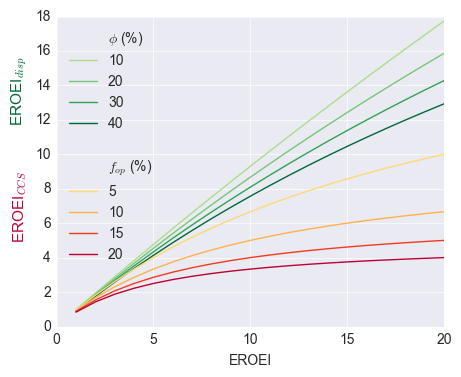

In [16]:
plt.figure(figsize=(5,4))
n=21
x=range(1,n)

colors=['#addd8e',
        '#78c679',
        '#31a354',
        '#006837']
plt.plot(0,0,lw=0,label='${\phi}$ (%)')
#ax=plt.gca().twinx()
esoi=15.2 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
eta= 0.78 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
fis=[0.1,0.2,0.3,0.4]
for r in range(len(fis)):
    fi=fis[r]
    y=[eroeist(i,fi,eta,esoi) for i in x]
    plt.plot(x,y,c=colors[r],label=int(fi*100))

#plt.ylabel('EROEI$_{storage}$')
plt.xlabel('EROEI')
a=plt.gca()
#plt.legend(framealpha=0,loc=2,fontsize=10)
plt.text(-0.07, 0.65, 'EROEI$_{disp}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#006837',transform=plt.gca().transAxes)
plt.text(-0.07, 0.27, 'EROEI$_{CCS}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#bd0036',transform=plt.gca().transAxes)

colors=['#fed976',
        '#feb24c',
        #'#fd8d3c',
        '#f03b20',
        '#bd0036']
plt.plot(0,0,lw=0,label=' ')
plt.plot(0,0,lw=0,label='$f_{op}$ (%)')
rops=[0.05,0.1,0.15,0.2]
for r in range(len(rops)):
    rop=rops[r]
    y=[eroeiccs(i,rop) for i in x]
    plt.plot(x,y,c=colors[r],label=int(rop*100))

#plt.ylabel('EROEI$_{CCS}$')
#plt.xlabel('EROEI')
plt.legend(framealpha=0,loc=2,fontsize=10)
#plt.savefig('z4.png',bbox_inches = 'tight', facecolor='w', pad_inches = 0.1, dpi=150)
plt.show()

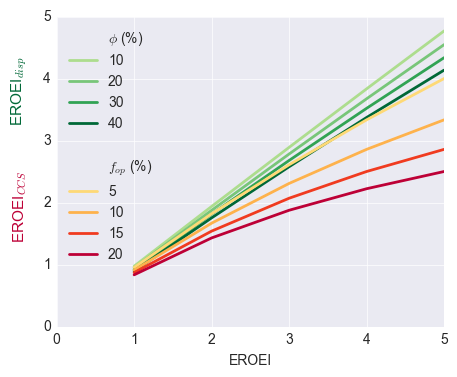

In [17]:
plt.figure(figsize=(5,4))
n=6
x=range(1,n)

colors=['#addd8e',
        '#78c679',
        '#31a354',
        '#006837']
plt.plot(0,0,lw=0,label='${\phi}$ (%)')
#ax=plt.gca().twinx()
esoi=15.2 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
eta= 0.78 #battery average http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h
fis=[0.1,0.2,0.3,0.4]
for r in range(len(fis)):
    fi=fis[r]
    y=[eroeist(i,fi,eta,esoi) for i in x]
    plt.plot(x,y,c=colors[r],label=int(fi*100),lw=2)

#plt.ylabel('EROEI$_{storage}$')
plt.xlabel('EROEI')
a=plt.gca()
#plt.legend(framealpha=0,loc=2,fontsize=10)
plt.text(-0.07, 0.65, 'EROEI$_{disp}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#006837',transform=plt.gca().transAxes)
plt.text(-0.07, 0.27, 'EROEI$_{CCS}$',
        horizontalalignment='right',
        verticalalignment='bottom',rotation=90,#fontproperties=prop,
        size=11,color='#bd0036',transform=plt.gca().transAxes)

colors=['#fed976',
        '#feb24c',
        #'#fd8d3c',
        '#f03b20',
        '#bd0036']
plt.plot(0,0,lw=0,label=' ')
plt.plot(0,0,lw=0,label='$f_{op}$ (%)')
rops=[0.05,0.1,0.15,0.2]
for r in range(len(rops)):
    rop=rops[r]
    y=[eroeiccs(i,rop) for i in x]
    plt.plot(x,y,c=colors[r],label=int(rop*100),lw=2)

#plt.ylabel('EROEI$_{CCS}$')
#plt.xlabel('EROEI')
plt.legend(framealpha=0,loc=2,fontsize=10)
#plt.savefig('z5.png',bbox_inches = 'tight', facecolor='w', pad_inches = 0.1, dpi=150)
plt.show()